In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':14})
import cmocean

In [2]:
ice, snow, area, uice, vice, uocean, vocean, uwind, vwind = np.load('veris_output.npy')

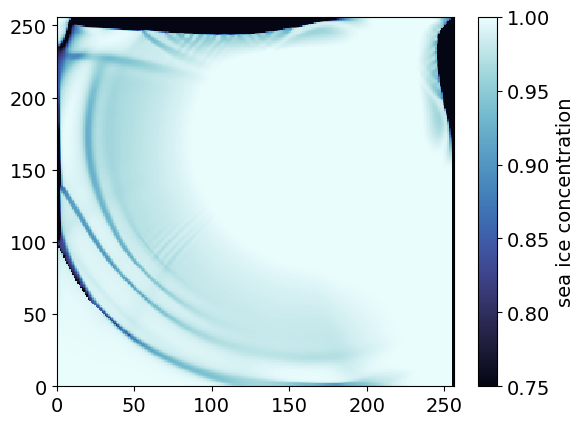

In [3]:
var = area.T

ind1 = 2
ind2 = 2
cut = var[ind1:-ind2,ind1:-ind2]

plt.pcolormesh(cut, vmin=0.75, cmap = cmocean.cm.ice)
plt.colorbar(label='sea ice concentration')

In [4]:
def plot(u, v, label, cmap, scale, levels, ticks):
    
    step = 20
    
    U = u.T[2:-2,2:-2][::step, ::step]
    V = v.T[2:-2,2:-2][::step, ::step]
    
    # Generate the coordinate grid
    N = 256  # Number of grid points in each direction
    x = np.linspace(0, N, N)
    y = np.linspace(0, N, N)
    X, Y = np.meshgrid(x, y)
    X = X[::step, ::step]
    Y = Y[::step, ::step]
    
    # Calculate the magnitude of the velocity field for the background color
    velocity_magnitude = np.sqrt(U**2 + V**2)
    velocity_magnitude[0,0] = 0.011
    
    # Create a discrete contour plot for the background using velocity magnitude
    plt.figure(figsize=(8, 6.5))
    contour_levels = np.linspace(np.min(velocity_magnitude), np.max(velocity_magnitude), levels)  # 6 discrete levels
    plt.contourf(X, Y, velocity_magnitude, levels=contour_levels, cmap=cmap)
    
    cbar = plt.colorbar()
    cbar.set_label(label)
    cbar.set_ticks(ticks)
    
    plt.quiver(X, Y, U, V, color='k', scale=scale)  # Adjust the scale for arrow length
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')

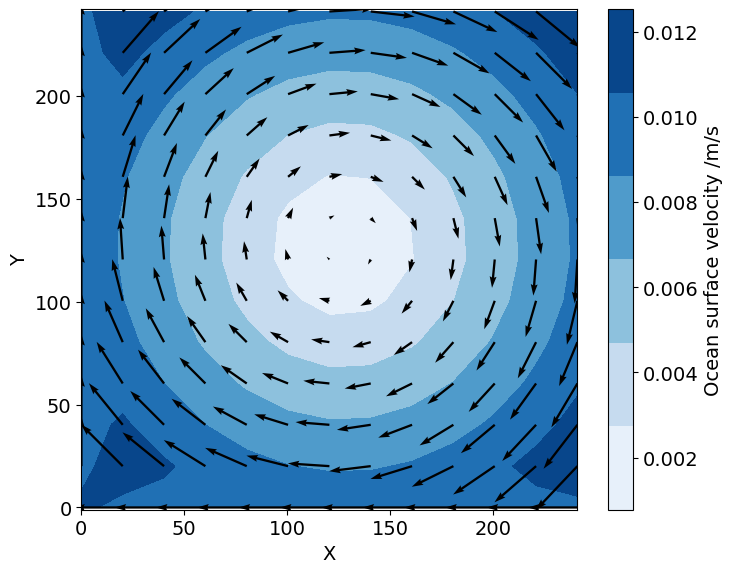

In [5]:
plot(uocean, vocean, label = 'Ocean surface velocity /m/s', cmap = 'Blues',
     scale = 0.1, levels = 7, ticks = np.arange(0.002,0.013,0.002))

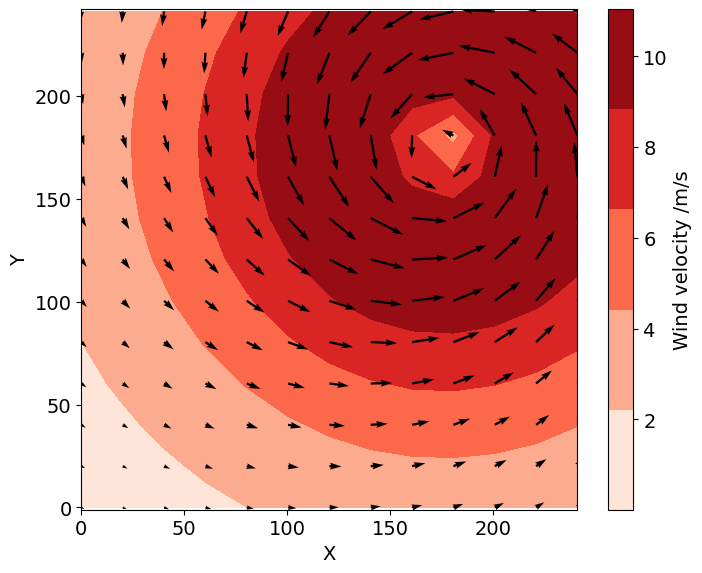

In [6]:
plot(uwind, vwind, label = 'Wind velocity /m/s', cmap = 'Reds',
     scale = 150, levels = 6, ticks = np.arange(2,12,2))